In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
#from sklearn.tree import export_graphviz import pydotplus
#import graphviz

In [2]:
data = pd.read_csv("winequality_red.csv")
data.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
X=data.drop(columns='quality')
y=data['quality']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=355)

In [6]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name
class_name

[7, 5, 3, 6, 4, 8]

In [8]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

#import graphviz
#import pydotplus
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("myTree.png")
# Show graph
Image(graph.create_png())

NameError: name 'feature_name' is not defined

In [7]:
clf.score(x_train,y_train)

1.0

In [8]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.625

In [9]:
cy_pred=clf.predict(x_test)
cy_pred

array([5, 5, 5, 5, 7, 6, 5, 6, 5, 6, 5, 6, 6, 4, 7, 6, 6, 7, 7, 7, 6, 6,
       5, 6, 6, 6, 5, 5, 6, 5, 5, 7, 6, 6, 4, 6, 5, 6, 6, 7, 7, 5, 5, 4,
       6, 6, 6, 6, 6, 6, 4, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 7, 6,
       8, 6, 7, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 4, 7, 5, 5, 7, 5, 5, 5, 3,
       5, 5, 6, 7, 6, 7, 6, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 7, 7, 6, 5,
       6, 7, 5, 5, 5, 6, 5, 7, 4, 6, 5, 6, 6, 5, 7, 4, 5, 7, 6, 6, 6, 7,
       5, 5, 7, 6, 5, 8, 6, 5, 5, 7, 7, 6, 7, 7, 5, 5, 6, 6, 6, 7, 5, 6,
       6, 5, 5, 6, 7, 5, 6, 6, 5, 6, 6, 7, 6, 6, 7, 7, 6, 6, 8, 7, 5, 6,
       7, 7, 5, 7, 7, 5, 6, 6, 6, 7, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 7,
       7, 4, 6, 5, 6, 5, 7, 5, 5, 6, 6, 5, 7, 8, 7, 5, 5, 6, 6, 7, 5, 5,
       6, 7, 5, 5, 5, 5, 5, 8, 5, 6, 5, 7, 5, 5, 6, 7, 5, 6, 5, 5, 5, 5,
       5, 5, 7, 7, 6, 4, 5, 5, 6, 5, 5, 7, 4, 6, 6, 5, 6, 6, 5, 6, 6, 5,
       6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 7, 5, 7, 5, 6, 6,
       6, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 7, 7, 5, 7,

In [10]:
scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.30, random_state= 355)

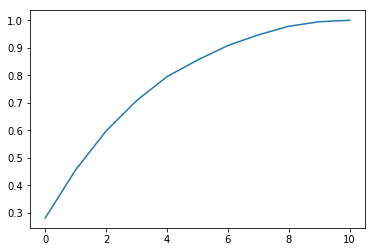

In [12]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [13]:
pca = PCA(n_components=10)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])

In [ ]:
principal_x

In [14]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)


0.5958333333333333

In [17]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [18]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [19]:
grid_search.fit(x_train,y_train)

C:\Users\HI\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(2, 32), 'min_samples_leaf': range(1, 10), 'min_samples_split': range(2, 10), 'splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 3, 'min_samples_split': 9, 'splitter': 'random'}


In [16]:
grid_search.best_score_

0.6058981233243967

In [22]:
clf1=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=9,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')
clf1.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=9,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [23]:
clf.score(x_train,y_train)
# accuracy of our classification tree
clf.score(x_test,y_test)

0.6541666666666667

In [24]:
grid_search.best_score_

0.6085790884718498